**1-st Task k-NN < LogReg**
Firstly, we have to make a linear dataset for this task.
Logistic regression can see a linear boundaries, while k-nearest neighbors can learn non-linear boundaries as well. So to beat it we should make our dataset as linear and as we can.

In [0]:
import numpy as np
dataset_size = 200
Y1 = np.full(100, 3).reshape(100,1)
Y2 = np.full(100, 6).reshape(100,1)
X1 = np.arange(100).reshape(100,1)
X2 = np.arange(100).reshape(100,1)
firstclass = np.concatenate((X1 , Y1), axis = 1)
secondclass = np.concatenate((X2 , Y2), axis = 1)
X = np.concatenate((firstclass, secondclass), axis = 0)
y1 = np.full(100, 0).reshape(100,1)
y2 = np.full(100, 1).reshape(100,1)
y = np.concatenate((y1, y2), axis = 0)

Let's see what we get

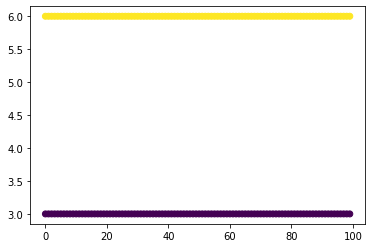

In [2]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c = y,)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=179)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=179)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
neighbours = KNeighborsClassifier(n_neighbors=8)
neighbours.fit(X_train, y_train)
numb_of_neighbours = np.arange(25)
gridparam = dict(n_neighbors = numb_of_neighbours)
knn = GridSearchCV(neighbours, gridparam, scoring = 'accuracy')
knn.fit(X_val, y_val)
neighbours = KNeighborsClassifier(n_neighbors = knn.best_params_['n_neighbors'])
neighbours.fit(X_train, y_train)
neighbours_test = accuracy_score(y_test, neighbours.predict(X_test))
print('accuracy on validation: ', knn.best_score_)

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=179, solver = "liblinear")
logreg.fit(X_train, y_train)
reg_str = np.arange(0,10,0.1)
gridparam = dict(C = reg_str)
lr = GridSearchCV(logreg, gridparam, scoring = 'accuracy')
lr.fit(X_val, y_val)
logreg = LogisticRegression(random_state=179, solver = "liblinear", C = lr.best_params_['C'])
logreg.fit(X_train, y_train)
logreg_test = accuracy_score(y_test, logreg.predict(X_test))
print('accuracy on validation: ', lr.best_score_)

In [6]:
print('knn test score: ', neighbours_test)
print('logreg test score: ', logreg_test)

knn test score:  0.65
logreg test score:  1.0


Because of the features of k-NN and LogReg I made an assumption, that k-NN is more about similarities between elements in the classes but not their inner features. As we can see k-NN made rather bad prediction, still better than tossing a coin, but much worse than preds by LogReg. Such structure of data made LogReg more usefull for classifying.


**2-nd Task k-NN > LogReg**
Here I'll try exact opposite structure, i should make it less linear, and more interdimensional.

In [0]:
Y11 = np.arange(25,50)
Y12 = np.arange(50,75)
X11 = np.arange(25,50)
X12 = np.arange(50,75)
Y21 = np.arange(37.5,50,0.5)
Y22 = np.arange(50,62.5,0.5)
X21 = np.arange(37.5,50,0.5)
X22 = np.arange(50,62.5,0.5)
Y1 = np.concatenate((Y11, Y12, Y12[::-1], Y11[::-1]), axis = 0).reshape(100,1)
X1 = np.concatenate((X11[::-1], X11, X12, X12[::-1]), axis = 0).reshape(100,1)
Y2 = np.concatenate((Y21, Y22, Y22[::-1], Y21[::-1]), axis = 0).reshape(100,1)
X2 = np.concatenate((X21[::-1], X21, X22, X22[::-1]), axis = 0).reshape(100,1)
firstclass = np.concatenate((X1 , Y1), axis = 1)
secondclass = np.concatenate((X2 , Y2), axis = 1)
X = np.concatenate((firstclass, secondclass), axis = 0)
y1 = np.full(100, 0).reshape(100,1)
y2 = np.full(100, 1).reshape(100,1)
y = np.concatenate((y1, y2), axis = 0)

Here is the Plot


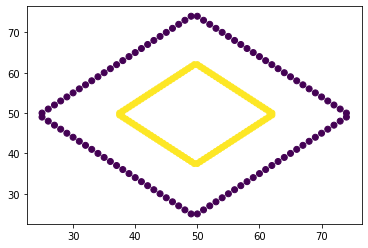

In [8]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c = y,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=179)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=179)

In [0]:
neighbours = KNeighborsClassifier(n_neighbors=8)
neighbours.fit(X_train, y_train)
numb_of_neighbours = np.arange(25)
gridparam = dict(n_neighbors = numb_of_neighbours)
knn = GridSearchCV(neighbours, gridparam, scoring = 'accuracy')
knn.fit(X_val, y_val)
neighbours = KNeighborsClassifier(n_neighbors = knn.best_params_['n_neighbors'])
neighbours.fit(X_train, y_train)
neighbours_test = accuracy_score(y_test, neighbours.predict(X_test))
print('accuracy on validation: ', knn.best_score_)

In [0]:
logreg = LogisticRegression(random_state=179, solver = "liblinear")
logreg.fit(X_train, y_train)
reg_str = np.arange(0,10,0.1)
gridparam = dict(C = reg_str)
lr = GridSearchCV(logreg, gridparam, scoring = 'accuracy')
lr.fit(X_val, y_val)
logreg = LogisticRegression(random_state=179, solver = "liblinear", C = lr.best_params_['C'])
logreg.fit(X_train, y_train)
logreg_test = accuracy_score(y_test, logreg.predict(X_test))
print('accuracy on validation: ', lr.best_score_)

In [12]:
print('knn test score: ', neighbours_test)
print('logreg test score: ', logreg_test)

knn test score:  1.0
logreg test score:  0.5


As I said k-NN better performs on interdimensional classifying, which i was trying to show on such dataset. We can see that such data distribution that doesnt depends on features much more suitable for k-NN, that defines the element position in the space. We can see that most of features could be both classes, and that distracts our LogReg and makes it nor better, nor worse than simple coin. What a dreadful moment for this poor LogReg boy. It cant find dependencies between classes and features and makes very many mistakes in classifying

**3-rd Task k-NN cosine > k-NN euclidean**
The main difference is that cosine metric compute the distance between two vectors of dots, not the distance between dots. So i decide to make a vector for one class And distribute another class among the space. My guess is in cause that the first class will be the vector so it will be easily diagnosed by cosine K-NN as a class. But to make life harder for euclidean K-NN I will place the second class as close to the vector of the first class as i can. That will make noise to euclidean K-NN because the distance between the dots of different classes will be the same or even smaller than the same class. 

In [0]:
np.random.seed(179)
X1 = np.random.triangular(0, 1000, 2000, size = 100).reshape(100,1)
Y1 = np.random.normal(loc = 0, scale = 10, size = 100).reshape(100,1)
firstclass = np.concatenate((X1 , Y1), axis = 1)
X2 = np.arange(0,2000,20).reshape(100,1)
Y2 = np.zeros(100).reshape(100,1)
secondclass = np.concatenate((X2 , Y2), axis = 1)
X = np.concatenate((firstclass, secondclass), axis = 0)
y1 = np.full(100, 0).reshape(100,1)
y2 = np.full(100, 1).reshape(100,1)
y = np.concatenate((y1, y2), axis = 0)

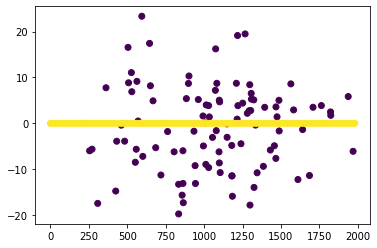

In [26]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c = y,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=179)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=179)

In [0]:
neighbourscos = KNeighborsClassifier(n_neighbors=8, metric="cosine")
neighbourscos.fit(X_train, y_train)
numb_of_neighbours = np.arange(25)
gridparam = dict(n_neighbors = numb_of_neighbours)
knncos = GridSearchCV(neighbourscos, gridparam, scoring = 'accuracy')
knncos.fit(X_val, y_val)
neighbourscos = KNeighborsClassifier(n_neighbors = knncos.best_params_['n_neighbors'], metric="cosine")
neighbourscos.fit(X_train, y_train)
neighbourscos_test = accuracy_score(y_test, neighbourscos.predict(X_test))
print('accuracy on validation: ', knncos.best_score_)

In [0]:
neighbourseu = KNeighborsClassifier(n_neighbors=8, metric="euclidean")
neighbourseu.fit(X_train, y_train)
numb_of_neighbours = np.arange(25)
gridparam = dict(n_neighbors = numb_of_neighbours)
knneu = GridSearchCV(neighbourseu, gridparam, scoring = 'accuracy')
knneu.fit(X_val, y_val)
neighbourseu = KNeighborsClassifier(n_neighbors = knneu.best_params_['n_neighbors'], metric="euclidean")
neighbourseu.fit(X_train, y_train)
neighbourseu_test = accuracy_score(y_test, neighbourseu.predict(X_test))
print('accuracy on validation: ', knneu.best_score_)

In [30]:
print('knn cosine test score: ', neighbourscos_test)
print('knn euclidean test score: ', neighbourseu_test)

knn cosine test score:  1.0
knn euclidean test score:  0.525


As we can see Euclidean K-NN lost in accuracy because of small distance between dots of the same class, when Cosine K-NN make very accurate prediction, because it compute the distance between vectors.